<a href="https://colab.research.google.com/github/ying-i/heart-disease/blob/main/heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease using Machine Learning
Given a person's health characteristics, we're going to build a model to predict whether or not they have heart disease.

In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset** is download from Kaggle: https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset




In our case, the independent variables are a patient's different medical attributes and the dependent variable is whether or not they have heart disease.



## 1. Preparing

**Pandas** for data analysis(**viewing and selecting data**).

**NumPy** for numerical operations and array operations(**creating and manipulating arrays**).

**Matplotlib** for data visualization: line plot, bar plot, scatter plot, etc.

Scikit-Learn for machine learning modelling and evaluation.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## 2. Loading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart-disease/heart-disease.csv")
df.shape #(rows,columns)

(303, 14)

In [ ]:
# check the head of our DataFrame
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# check top 10 rows of our dataframe
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
# see how many positive(1) and negative(0) samples we have in our dataframe
df.target.value_counts()

,count
target,
1,165
0,138


In [ ]:
# Normalized value counts to see values in percentages
df.target.value_counts(normalize=True)


,proportion
target,
1,0.544554
0,0.455446


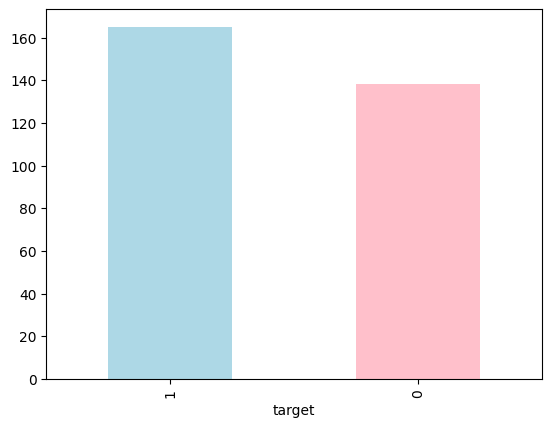

In [ ]:
# plot the target column value counts using bar plot
df.target.value_counts().plot(kind="bar", color=["lightblue","pink"]);

In [ ]:
# get quick insight into the number of missing values we have and what type of data we're working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# another way to get quick insight on our dataframe
# describe() shows a range of different metrics about our bumerical columns such as mean, max and standard deviation.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# compare two columns to each other, you can use the function pd.crosstab(index, columns)
# from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.
df.sex.value_counts()

,count
sex,
1,207
0,96


In [ ]:
# There are 207 males and 96 females in our study.
# to compare the target column values with the sex column values:
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


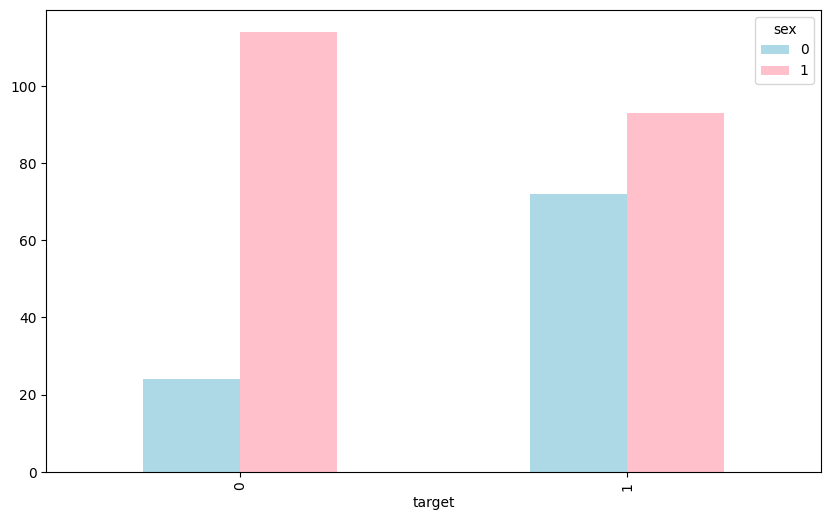

In [ ]:
# We can plot our pd.crosstab comparison by calling the plot() method and passing it a few parameters:
# kind- The type of plot you want (e.g. "bar" for a bar plot).
# figsize=(length, width) - How big you want it to be.
# color=[colour_1, colour_2] - The different colours you'd like to use.
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["lightblue","pink"]);

## 3. Visualization using Matplotlib

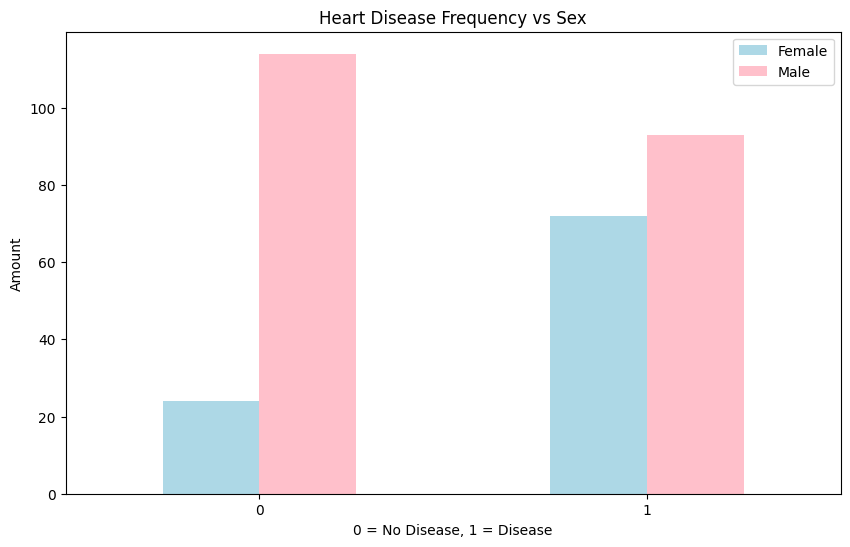

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["lightblue","pink"]);
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

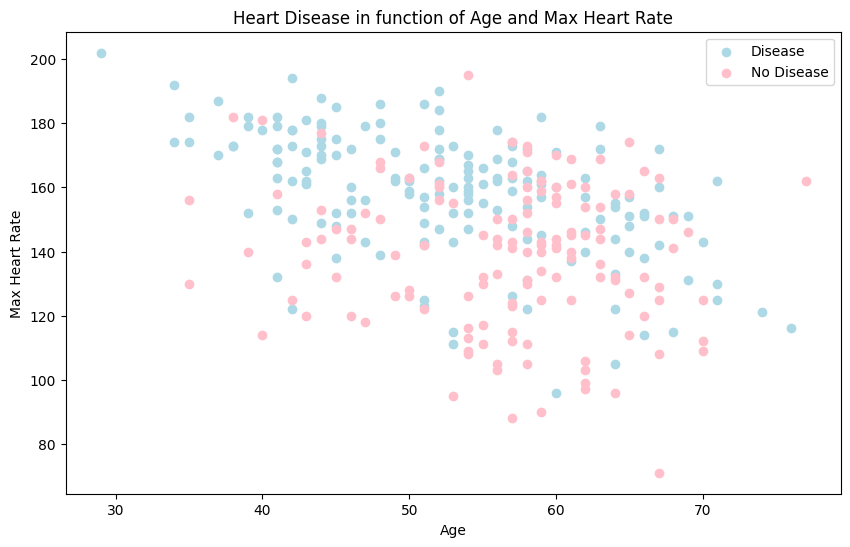

In [ ]:
# comparing age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.
# Because there are so many different values for age and thalach, we'll use a scatter plot.

# create another figure
plt.figure(figsize=(10,6))
# start with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="lightblue")
# for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="pink") # axis always come as (x,y)
# add some info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

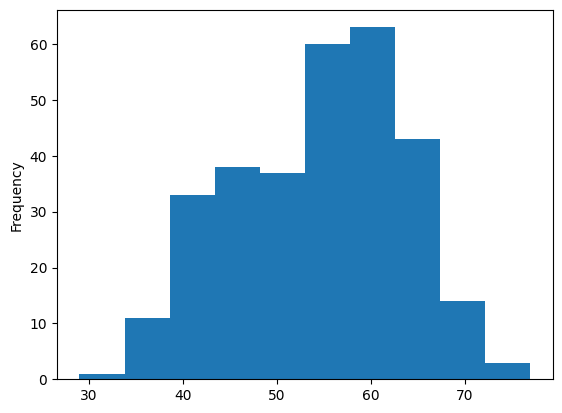

In [ ]:
# using Histograms to check the age distribution
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

In [ ]:
# comparing heart disease frequency and chest pain type (the same process as we did before with sex)
# so the cp (chest pain) is the independent variable.
# 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart),
# 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease)
pd.crosstab(index=df.cp, columns=df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


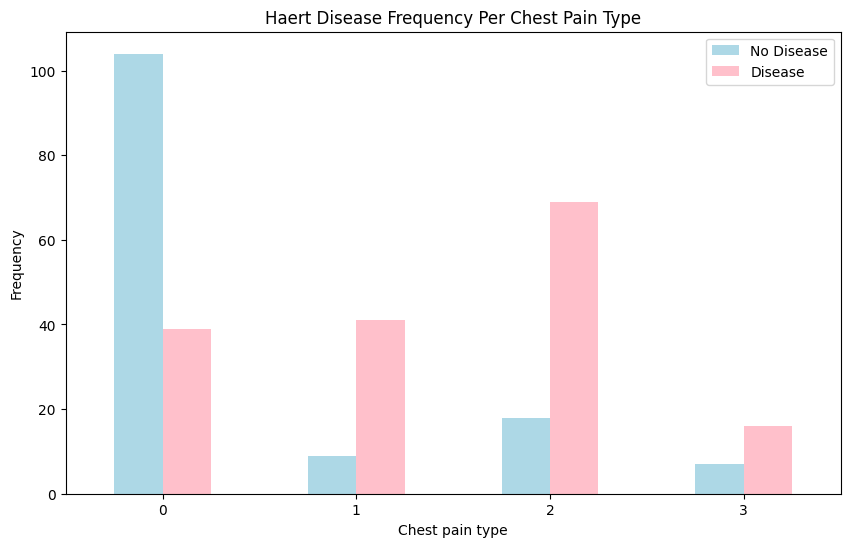

In [ ]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["lightblue","pink"])
# add attributes to the plot to make it more readable
plt.title("Haert Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [ ]:
# finding correlation between independent variables using corr()
# see which independent variables may or may not have an impact on our target variable
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


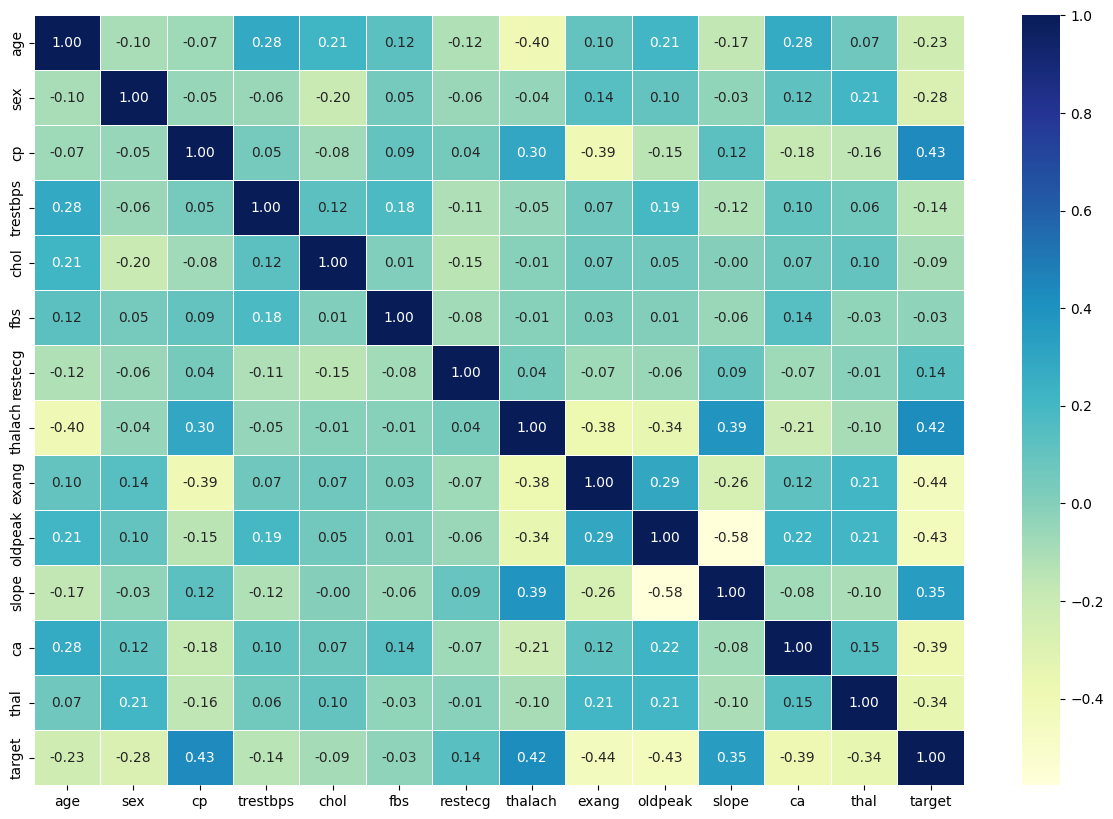

In [ ]:
# plot a heatmap for this matrix
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True, # display the numerical values inside each cell of the heatmap
            linewidths=0.5, # define the width of lines separating each cell
            fmt=".2f", # specofies the values inside the heatmap should be formatted as floating-point numbers with two decimal places
            cmap="YlGnBu"); # YlGnBu:Yellow-Green-Blue, which represents data with a gradient from yellow(low value) to blue(high values).

#  A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

## 4. Modeling
To build a machine learning model to be able to predict our target variable based on the 13 independent variables.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 to predict our target variable using all of the other variables

 split the target variable from the rest:

 x: Our features (all variables except the target column)

 y: Our target variable

In [ ]:
# everything except target variable
X=df.drop(labels="target", axis=1) # axis=1 specifies that we are dropping a column (not a row)
# target variable
y= df.target.to_numpy() # extracts the "target" column and converts it to a NumPy array

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y,type(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

 to split our data into a training set and a test set

 We'll use our training set to train our model and our test set to evaluate it.

 **Training set** (often 70-80% of total data)

 **Testing set** (often 20-30% of total data)

For our problem, a train and test set are enough. But for other problems, could also use a validation (train/validation/test) set or cross-validation


In [ ]:
# Random seed for reproducibility (since train_test_split is random by default, setting the seed will create reproducible splits)
# Ensures the same random numbers are generated across different runs.
np.random.seed(42)
# Split into train & test set using Scikit-Learn's sklearn.model_selection.train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set
                                                    # use 80% of your data to train on and the other 20% to test

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [ ]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242)

In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]),
 61)

**Choosing a model**

to try the following models and comparing their results:

1. Logistic Regression - sklearn.linear_model.LogisticRegression()

2. K-Nearest Neighbors - sklearn.neighbors.KNeighboursClassifier()

3. RandomForest - sklearn.ensemble.RandomForestClassifier()

Many of the algorithms in the Scikit-Learn library have similar APIs (Application Programming Interfaces).

For example, for training a model you can use model.fit(X_train, y_train).

And for scoring a model model.score(X_test, y_test) (scoring a model compares predictions to the ground truth labels).

In [ ]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100),
          "Random Forest": RandomForestClassifier()}
# create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
  """
  # random seed for reproducible results
  np.random.seed(42)
  # make a list to keep model scores
  model_scores={}
  # loop through models
  for name, model in models.items():
    # fit the model to the data
    model.fit(X_train, y_train)
    # evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test,y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

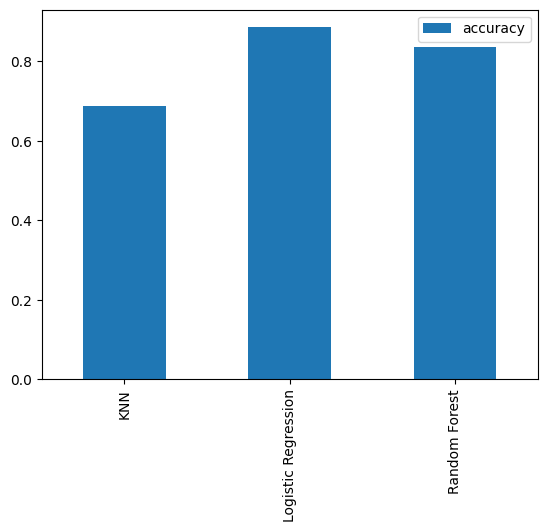

In [ ]:
# comparing the results of models
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(); #By transposing (.T), the DataFrame switches rows and columns

so,  it looks like the sklearn.linear_model.LogisticRegression() model performs best

## 5. Hyperparameter tuning and cross-validation

Many machine learning models have a series of settings/dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance. The practice of figuring out the best settings for a model is called **hyperparameter tuning**.

**cross-validation**: Splits your dataset into multiple versions of training and test sets and trains/evaluations the model on each different version. This ensures that evaluation metrics are across several different splits of data rather than a single split. If it was only a single split, you might get lucky and get better than usual results, the same for the reverse, if we get a poor split, we might find the metrics lower than they should be.

The most common type of cross-validation is k-fold.
If (k = 5), we'll have 5 different versions of train and test splits. This means we'll be able to train and test 5 different versions of your model on different data splits and calculate the average performance.

To test different hyperparameters, we could use a validation set but since we don't have much data, we'll use cross-validation.

A validation set is designed to be used in between a training and test set

### 5.1 Tune KNeighborsClassifier by hand

sklearn.neighbors.KNeighborsClassifier).

The default number of neighbors is 5 (n_neigbors=5).

If n_neighbors=5 then it assume a dot with the 5 closest dots around it are in the same class.




In [ ]:
# Tune KNeighborsClassifier
# try a few different values of n_neighbors and test how the results go

# create a list of train scores
train_scores = []
# create a list of test scores
test_scores=[]
# create a list of different values for n_neighbors
neighbors = range(1,21) # 1 to 20
#setup algorithm
knn = KNeighborsClassifier()
# loop through different neighbors values
for i in neighbors:
  knn.set_params(n_neighbors=i)
  # fit the algorithm
  knn.fit(X_train, y_train)
  # update the training score
  train_scores.append(knn.score(X_train, y_train))
  #update the test scores
  test_scores.append(knn.score(X_test, y_test))



In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


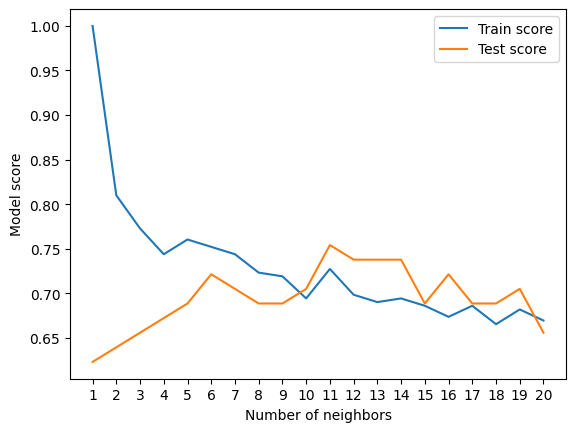

In [ ]:
# plot train_scores and test_scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1)) # set the x-axis tick marks from 1 to 20 (inclusive) with a step size of 1
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

n_neighbors = 11, KNN score=75.41%

so KNN's model performance didn't get near what LogisticRegression or the RandomForestClassifier did. Because of this, we'll discard KNN.

### 5.2 Tuning models with with RandomizedSearchCV

Tuning LogisticsRegression and RandomForestClassifier using RandomizedSearchCV.


In [ ]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), # generates 20 values between 10^(-4) and 10^4
                "solver": ["liblinear"]} #  liblinear solver is good for small datasets and binary classification

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50), # from 10 to 1000 in steps of 50
           "max_depth": [None, 3, 5, 10], # Depth of each tree. None means trees grow until pure leaves
           "min_samples_split": np.arange(2, 20, 2), # Minimum samples required to split a node, from 2 to 20 in steps of 2
           "min_samples_leaf": np.arange(1, 20, 2)} # Minimum samples required at a leaf node, from 1 to 19 in steps of 2.

**5.2.1 tuning LogisticRegression using RandomizedSearchCV**

use sklearn.model_selection.RandomizedSearchCV to try and tune our LogisticRegression model.

pass it the different hyperparameters from log_reg_grid as well as set n_iter=20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [ ]:
%%time
# %%time: measures the execution time of a cell

# setup random seed
np.random.seed(42)

# setup random hyperparameter search for logisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5, # 5-fold cross-validation
                              n_iter=20, # evaluates 20 random parameter combinations
                              verbose=True) # Prints progress
# fit random hyperparameter search model
rs_log_reg.fit(X_train,y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 315 ms, sys: 992 µs, total: 316 ms
Wall time: 315 ms


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
#fnd the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

0.8852459016393442 : the same score as before

 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918

**5.2.2 tuning RandomForestClassifier using RandomizedSearchCV**


In [ ]:
%%time

# setup random seed
np.random.seed(42)

# setup random hyperparameter search for logisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5, # 5-fold cross-validation
                              n_iter=20, # evaluates 20 random parameter combinations
                              verbose=True) # Prints progress
# fit random hyperparameter search model
rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 53.3 s, sys: 230 ms, total: 53.5 s
Wall time: 54.1 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
# evaluate the randomized search random forest model
rs_rf.score(X_test,y_test)

0.8688524590163934

 after tuned, there is a slight perfermance boost in Random Forest.

 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918

###5.3 Tuning a model with GridSearchCV
**sklearn.model_selection.RandomizedSearchCV** searches over a grid of hyperparameters performing n_iter combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).

**sklearn.model_selection.GridSearchCV** will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time)

In [ ]:
%%time

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20), # generates 20 values between 10^(-4) and 10^4
                "solver": ["liblinear"]} #  liblinear solver is good for small datasets and binary classification

# setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                              param_grid=log_reg_grid,
                              cv=5, # 5-fold cross-validation
                              verbose=True) # Prints progress

# fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 551 ms, sys: 1.97 ms, total: 553 ms
Wall time: 593 ms


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442


In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.


##6. Evaluating a classification

ROC curve and AUC score: sklearn.metrics.RocCurveDisplay()

Confusion matrix:	sklearn.metrics.confusion_matrix()

Classification report:	sklearn.metrics.classification_report()

Precision:	sklearn.metrics.precision_score()

Recall:	sklearn.metrics.recall_score()

F1-score:	sklearn.metrics.f1_score()


**Precision:**	A common classification evaluation metric. Measures the proportion of true positives over total number of samples. Higher precision leads to fewer false positives.

**Recall:**	A common classification evaluation metric. Measures the proportion of true positives over total number of true positives and false negatives. Higher recall leads to fewer false negatives.


**F1 score:**	**Harmonic mean of Precision & Recall**.Combines precision and recall into one metric. 1 is best, 0 is worst.  

**ROC Curve:**	Receiver Operating Characterisitc is a plot of **true positive rate versus false positive rate**. A perfect curve will follow the left and top border of a plot.

When making predictions with a trained model, the data you're trying to predict on must be in the same format your model was trained on.


In [ ]:
#  make predictions by calling predict() on a trained model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

###6.1 ROC Curve and AUC Scores
ROC curve: how your model is performing by comparing the true positive rate to the false positive rate.

A **false positive** in this case occurs when the person tests positive, but does not actually have the disease.

A **false negative** occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function RocCurveDisplay which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.






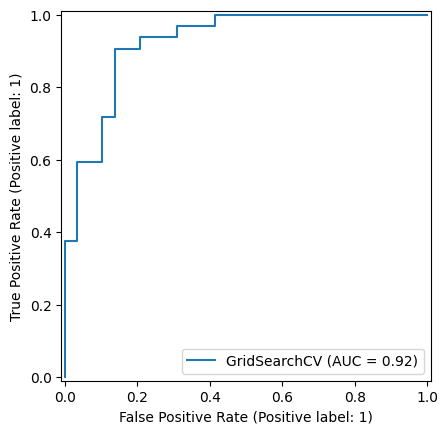

In [ ]:
from sklearn.metrics import RocCurveDisplay

# from_estimator(): use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test);


 perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

###6.2 Creating a confusion matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using sklearn.metrics.confusion_matrix()

In [ ]:
# display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


using Seaborn's heatmap() to make it visual

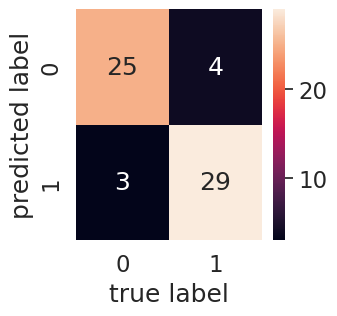

In [ ]:
# import seaborn
import seaborn as sns
sns.set(font_scale=1.5) # increase font size, making text (labels, annotations) 1.5 times larger than the default.

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # displays the numerical values inside the heatmap cells.
                     )
    plt.xlabel("true label")
    plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

###6.3 classification report
A classification report is a collection of different metrics and other details.

using sklearn.metrics.classification_report(y_true, y_pred) to make a classification report


In [ ]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61





**Precision**:Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

**Recall**: Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

**F1 score**:	A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

**Support**:The number of samples each metric was calculated on.

**Accuracy**:	The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

**Macro avg**:	Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

**Weighted avg**:	Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).




These were all calculated using a single training and test set.
we'll do to make them more solid is calculate them using cross-validation.
We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels.
It then evaluates the machine learning model on the data and labels using cross-validation across cv=5 (the default number of splits) splits and a defined scoring parameter.

In [ ]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# import cross_val_score
from sklearn.model_selection import cross_val_score
#instantiate best model with best hyperparameters(found with GridSearchCV)
clf = LogisticRegression(C= 0.23357214690901212,
                         solver="liblinear")


In [ ]:
%%time
# cross-validation accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,# 5-fold cross-validation, this is the default
                         scoring="accuracy")# accuracy as scoring
cv_acc

CPU times: user 23.9 ms, sys: 0 ns, total: 23.9 ms
Wall time: 23.3 ms


array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

The output from cross_val_score() shows 5 different metrics across different splits of the data.

Since there are 5 metrics here, we'll take the average.

In [ ]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

do the same for other classification metrics:

In [ ]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [ ]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [ ]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

Visualize them:

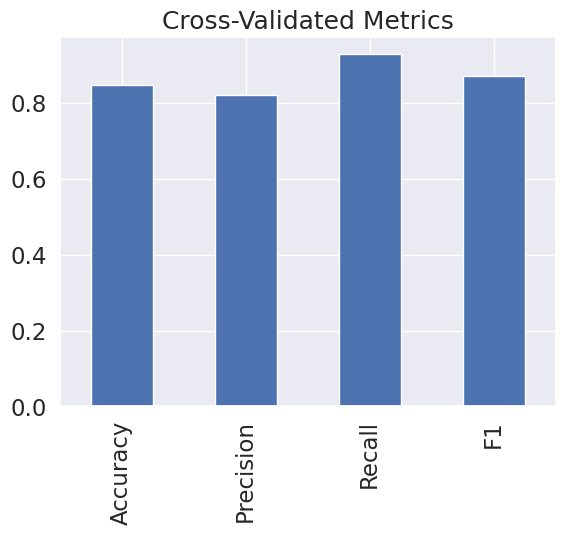

In [ ]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

##7. feature importance
to see which features contribute most to the outcomes of the model

to calculate feature importance for LogisticRegression using coef_ attribute

In [ ]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [ ]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

these values are how much each feature contributes to how a model makes a decision

In [ ]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

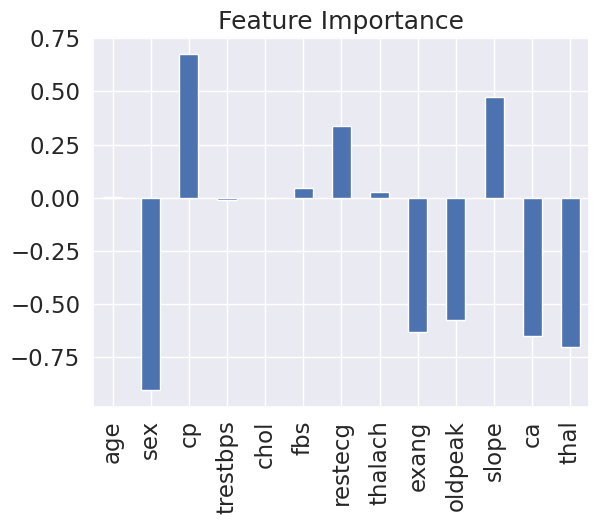

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.